In [1]:
import config
config.base_url

'https://api.themoviedb.org/3'

In [2]:
import requests

In [ ]:
params = {'api_key': config.api_key, 'sort_by':'vote_average.desc', 'vote_count.gte': 100,
          'page': 2, 
          'with_original_language': 'en'}


In [ ]:
base_url = config.base_url

In [ ]:
response = requests.get(base_url + '/discover/movie', params = params)

In [ ]:
response.status_code == 200

In [ ]:
response.json()['results']

In [ ]:
less_info = list(map(lambda x: {'id':x['id'],
                                'vote_average': x['vote_average'],
                                'title': x['title'],
#                                 'genre_ids': x['s'],
                               },response.json()['results']))
less_info

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
def movie_actors():
    
    html_page = requests.get('https://www.themoviedb.org/movie/'+'182560'+'/cast')
    soup = BeautifulSoup(html_page.content, 'html.parser')
    div = soup.find('ol', class_='people credits')
    all_divs = div.findAll('div', class_='info')
    
    actors = []
    for tag in all_divs:
        actors.append(tag.text.split('\n')[1])
    return actors
movie_actors()

In [3]:
import mysql.connector
from mysql.connector import errorcode

conn = mysql.connector.connect(
    host = config.host,
    user = config.user,
    passwd = config.password,
    database = 'movie_insights'
)
c = conn.cursor()
# conn.commit()
# c.close()
# conn.close()

In [ ]:
import datetime
def scrape_info(movie_dict):
    movie_id = movie_dict['id']
    html_page = requests.get('https://www.themoviedb.org/movie/' + str(movie_id)) #Make a get request to retrieve the page
    soup = BeautifulSoup(html_page.content, 'html.parser') #Pass the page contents to beautiful soup for parsing
    releases = soup.find('ul', class_="releases")
    revenue = releases.nextSibling.nextSibling.nextSibling.nextSibling.nextSibling.nextSibling.nextSibling.nextSibling
    try:
        movie_dict['revenue'] = float(str(revenue.text).replace(revenue.strong.text, "").replace('$','').replace(',','').strip())
    except:
        movie_dict['revenue'] = None
    budget = releases.nextSibling.nextSibling.nextSibling.nextSibling.nextSibling.nextSibling
    try:
        movie_dict['budget'] = float(str(budget.text).replace(budget.strong.text, "").replace('$','').replace(',','').strip())
    except:
        movie_dict['budget'] = None
    release_date = releases.div.previous_sibling.previous_sibling.previous_sibling.replace('\n','').strip()
    movie_dict['release_date'] = datetime.datetime.strptime(release_date, "%B %d, %Y").date()
#     movie_dict['language'] = list(releases.nextSibling.nextSibling.children)[1].strip()
#     html_page = requests.get('https://www.themoviedb.org/movie/'+ str(movie_id) + '/cast')
#     soup = BeautifulSoup(html_page.content, 'html.parser')
#     div = soup.find('ol', class_='people credits')
#     all_divs = div.findAll('div', class_='info')
    
#     actors = []
#     for tag in all_divs:
#         actors.append(tag.text.split('\n')[1])
#     movie_dict['actors'] = actors
    return movie_dict
    

In [ ]:

movie_info = list(map(scrape_info,less_info))
movie_info


In [ ]:
import mysql.connector
from mysql.connector import errorcode

conn = mysql.connector.connect(
            host = config.host,
            user = config.user,
            passwd = config.password,
            database = 'movie_insights'
            )
c = conn.cursor()
def populate_db(records, table_name):
#     INSERT_STRING = ("INSERT INTO {table_name} "
#                "(id, vote_average, title, genre_ids, revenue, budget, release_date) "
#                "VALUES (%s, %s, %s, %s)")
    INSERT_STR = f'INSERT INTO {table_name} (id, vote_average, title, revenue, budget, release_date) ' 
    VALUE_STR = 'VALUES (%s, %s, %s, %s, %s, %s)'
    INSERT_QUERY = INSERT_STR + VALUE_STR
    
    for rec in movie_info:
            values = tuple(rec.values())
            c.execute(INSERT_QUERY, values)
    conn.commit()


    
populate_db(movie_info,'movie_info')
c.close()
conn.close()  

In [ ]:
movie_genre = []
for movie in movie_info:
    movie_genre.extend(movie['genre_ids'])
movie_genre

In [ ]:
movie_genre_dict = dict.fromkeys(set(movie_genre),0)
for genre in movie_genre:
    movie_genre_dict[genre] += 1
movie_genre_dict

In [ ]:
import matplotlib.pyplot as plt



plt.bar(range(len(movie_genre_dict)), list(movie_genre_dict.values()), align='center')
plt.xticks(range(len(movie_genre_dict)), list(movie_genre_dict.keys()), rotation='vertical')
plt.xlabel('genre')
plt.ylabel('No. of appearances')
plt.show()

In [ ]:
html_page = requests.get('https://www.themoviedb.org/movie/429617-spider-man-far-from-home') #Make a get request to retrieve the page
soup = BeautifulSoup(html_page.content, 'html.parser') #Pass the page contents to beautiful soup for parsing

In [ ]:
soup.prettify

In [ ]:
releases = soup.find('ul', class_="releases")
releases #Previewing is optional but can help you verify you are selecting what you think you are


In [ ]:
language = list(releases.nextSibling.nextSibling.children)[1].strip()
language

In [ ]:
revenue = releases.nextSibling.nextSibling.nextSibling.nextSibling.nextSibling.nextSibling.nextSibling.nextSibling
revenue
revenue.strong.text
revenue.text
float(str(revenue.text).replace(revenue.strong.text, "").replace('$','').replace(',','').strip())

In [ ]:
budget = releases.nextSibling.nextSibling.nextSibling.nextSibling.nextSibling.nextSibling
float(str(budget.text).replace(budget.strong.text, "").replace('$','').replace(',','').strip())

In [ ]:
import datetime
release_date = releases.div.previous_sibling.previous_sibling.previous_sibling.replace('\n','').strip()
release_date = datetime.datetime.strptime(release_date, "%B %d, %Y").date()
release_date

In [ ]:
type(.0)

In [ ]:
releases.find('')

In [ ]:
list(revenue.children)[1]

In [ ]:
import random
x = 1
y = 1
count = 0
for i in range(10000000):
    x = y
    y = random.randrange(1,7)
    if x == y:
        count += 1
count/10000000

In [ ]:
1/36

In [ ]:
def actor_info():
    html_page = requests.get('https://www.themoviedb.org/person/' + '119589')
    soup = BeautifulSoup(html_page.content, 'html.parser')
    div = soup.find('section', class_='facts left_column')
    traits = []
    for i in range(len(div.findAll('p'))-4):
        traits.extend(list(div.findAll('p')[i].children)[1].split())
    traits[4:8] = [' '.join(traits[4:8])]
    
#     traits.extend(traits[4].split(','))
#     print(traits)
#     del traits[4:6]
#     del traits[5]
#the above code is if we only want STATES (i.e. Georgia, California) the code is unfinished
    return traits

actor_info()

In [ ]:
def genre_id():
    parameters = {'api_key': config.api_key} #these parameters go in to the URL
    response = requests.get('https://api.themoviedb.org/3/genre/movie/list?language=en-US', params = parameters)
    response.status_code #check this, should be 200
    return response.json()

In [ ]:
def mojo_franchise_top_films():
    
    #BeautifulSoup setup
    html_page = requests.get('https://www.boxofficemojo.com/franchises/?view=Brand&p=.htm')
    soup = BeautifulSoup(html_page.content, 'html.parser')
    div = soup.find('table', border="0", cellspacing="1",
               cellpadding="5", width="95%")
    
    top_pictures = []
    for i in range(len(div.findAll('td', align="center"))):
        top_pictures.append(list(list(list(div.findAll('td', align="center")[i].children)[0].children)[0].children)[0])
    del(top_pictures[:5]) #deleting first 5 elements, they're not movies
    return top_pictures
mojo_franchise_top_films()

In [ ]:
def mojo_franchise_names():
    
    html_page = requests.get('https://www.boxofficemojo.com/franchises/?view=Brand&p=.htm')
    soup = BeautifulSoup(html_page.content, 'html.parser')
    div = soup.find('table', border="0", cellspacing="1",
               cellpadding="5", width="95%")
    
    franchise = []
    for i in range(len(div.findAll('b'))):
        franchise.append(list(div.findAll('b')[i].children)[0])
    del franchise[0]
    return franchise
mojo_franchise_names()

In [ ]:
def mojo_franchise_data():
    
    html_page = requests.get('https://www.boxofficemojo.com/franchises/?view=Brand&p=.htm')
    soup = BeautifulSoup(html_page.content, 'html.parser')
    div = soup.find('table', border="0", cellspacing="1",
               cellpadding="5", width="95%")
    
    brand_values = []
    total_gross = []
    total_movies = []
    avg_gross_per_movie = []
    top_picture_gross = []
    dictionary = {}
    
    dictionary['franchise_name'] = mojo_franchise_names()
    output = list(div.findAll('td', align="right"))
    for i in range(len(output)):
        brand_values.extend(list(list(div.findAll('td', align="right")[i].children)[0].children))
#         time.sleep(1)
        if i % 4 == 0:
            total_gross.append(brand_values[i])
            dictionary['total_gross'] = total_gross    
        elif i % 4 == 1:
            total_movies.append(brand_values[i])
            dictionary['total_movies'] = total_movies
        elif i % 4 == 2:
            avg_gross_per_movie.append(brand_values[i])
            dictionary['avg_gross_per_movie'] = avg_gross_per_movie
        elif i % 4 == 3:
            dictionary['top_picture'] = mojo_franchise_top_films()
            top_picture_gross.append(brand_values[i])
            dictionary['top_picture_gross'] = top_picture_gross

            
    return dictionary

mojo_franchise_data()



In [ ]:
cnx = mysql.connector.connect(
    host = config.host,
    user = config.user,
    passwd = config.password,
    database = DB_NAME
)

In [66]:
import requests
from bs4 import BeautifulSoup
import mysql.connector
from mysql.connector import errorcode
import datetime
import config

conn = mysql.connector.connect(
                host = config.host,
                user = config.user,
                passwd = config.password,
                database = 'movie_insights'
                )
c = conn.cursor()
for i in range(1,51):
    params = {'api_key': config.api_key, 'sort_by':'vote_average.desc', 'vote_count.gte': 100,
              'page': i, 
              'with_original_language': 'en'}
    base_url = config.base_url
    response = requests.get(base_url + '/discover/movie', params = params)
    if response.status_code != 200:
        print(f'Break at {i}, status code: {response.status_code}')
        break
    
    less_info = list(map(lambda x: {'id':x['id'], 
                                    'title': x['title'],
#                                     'genre_ids': x['genre_ids'],
                                   },response.json()['results']))
    

    def scrape_info(movie_dict):
        movie_id = movie_dict['id']
        html_page = requests.get('https://www.themoviedb.org/movie/' + str(movie_id)) #Make a get request to retrieve the page
        soup = BeautifulSoup(html_page.content, 'html.parser') #Pass the page contents to beautiful soup for parsing
        releases = soup.find('ul', class_="releases")
        revenue = releases.nextSibling.nextSibling.nextSibling.nextSibling.nextSibling.nextSibling.nextSibling.nextSibling
        try:
            movie_dict['revenue'] = float(str(revenue.text).replace(revenue.strong.text, "").replace('$','').replace(',','').strip())
        except:
            movie_dict['revenue'] = None
        budget = releases.nextSibling.nextSibling.nextSibling.nextSibling.nextSibling.nextSibling
        try:
            movie_dict['budget'] = float(str(budget.text).replace(budget.strong.text, "").replace('$','').replace(',','').strip())
        except:
            movie_dict['budget'] = None
        release_date = releases.div.previous_sibling.previous_sibling.previous_sibling.replace('\n','').strip()
        movie_dict['release_date'] = datetime.datetime.strptime(release_date, "%B %d, %Y").date()
#         movie_dict['language'] = list(releases.nextSibling.nextSibling.children)[1].strip()
#         html_page = requests.get('https://www.themoviedb.org/movie/'+ str(movie_id) + '/cast')
#         soup = BeautifulSoup(html_page.content, 'html.parser')
#         div = soup.find('ol', class_='people credits')
#         all_divs = div.findAll('div', class_='info')
    
#         actors = []
#         for tag in all_divs:
#             actors.append(tag.text.split('\n')[1])
#         movie_dict['actors'] = actors
        return movie_dict

    movie_info = list(map(scrape_info,less_info))
    
    def populate_db(records, table_name):
#         INSERT_STRING = ("INSERT INTO {table_name} "
#                    "(id, vote_average, title, genre_ids, revenue, budget, release_date) "
#                    "VALUES (%s, %s, %s, %s)")
        INSERT_STR = f'INSERT INTO {table_name} (id, vote_average, title, revenue, budget, release_date) ' 
        VALUE_STR = 'VALUES (%s, %s, %s, %s, %s, %s)'
        INSERT_QUERY = INSERT_STR + VALUE_STR
    
        for rec in movie_info:
            values = tuple(rec.values())
            c.execute(INSERT_QUERY, values)
        conn.commit()

    populate_db(movie_info,'movie_info')
c.close()
conn.close()  
    
    

IntegrityError: 1062 (23000): Duplicate entry '415086' for key 'PRIMARY'

In [90]:
import requests
from bs4 import BeautifulSoup
import mysql.connector
from mysql.connector import errorcode
import datetime
import config

conn = mysql.connector.connect(
                host = config.host,
                user = config.user,
                passwd = config.password,
                database = 'movie_insights'
                )
c = conn.cursor()
c.execute('select id from movie_info')
movie_ids = list(map(lambda x: x[0],c.fetchall()))
len(movie_ids)

1020

In [88]:
def get_actor_info(list_of_movie_ids):
    INSERT_STR = f'INSERT INTO actor_info (name, movie_id) ' 
    VALUE_STR = 'VALUES (%s, %s)'
    INSERT_QUERY = INSERT_STR + VALUE_STR
    for i in range(554,len(movie_ids)):
        
        html_page = requests.get('https://www.themoviedb.org/movie/'+ str(movie_ids[i]) + '/cast')
        if html_page.status_code!= 200:
            print(f'Break at {i},status_code:{html_page.status_code}')
        soup = BeautifulSoup(html_page.content, 'html.parser')
        div = soup.find('ol', class_='people credits')
        try:
            all_divs = div.findAll('div', class_='info')
        except:
            all_divs = []
    
        actors = []
        for tag in all_divs:
            actors.append(tag.text.split('\n')[1])
        for actor in actors:
            values = (actor, movie_ids[i])
            c.execute(INSERT_QUERY, values)
        conn.commit()
        


get_actor_info(movie_ids)
c.close()
conn.close()

In [31]:
import requests
from bs4 import BeautifulSoup
import mysql.connector
from mysql.connector import errorcode
import datetime
import config

conn = mysql.connector.connect(
                host = config.host,
                user = config.user,
                passwd = config.password,
                database = 'movie_insights'
                )
c = conn.cursor()
c.execute('select id from movie_info')
movie_ids = list(map(lambda x: x[0],c.fetchall()))
len(movie_ids)

def get_actor_info(list_of_movie_ids):
    INSERT_STR = f'INSERT INTO actor_info (name, movie_id) ' 
    VALUE_STR = 'VALUES (%s, %s)'
    INSERT_QUERY = INSERT_STR + VALUE_STR
    for i in range(554,len(movie_ids)):
        
        html_page = requests.get('https://www.themoviedb.org/movie/'+ str(movie_ids[i]) + '/cast')
        if html_page.status_code!= 200:
            print(f'Break at {i},status_code:{html_page.status_code}')
        soup = BeautifulSoup(html_page.content, 'html.parser')
        div = soup.find('ol', class_='people credits')
        try:
            all_divs = div.findAll('div', class_='info')
        except:
            all_divs = []
    
        actors = []
        for tag in all_divs:
            actors.append(tag.text.split('\n')[1])
        for actor in actors:
            values = (actor, movie_ids[i])
            c.execute(INSERT_QUERY, values)
        conn.commit()
        


get_actor_info(movie_ids)
c.close()
conn.close()

In [40]:
dict_list=[]
for j in range(57):
    html_page = requests.get(f'https://www.the-numbers.com/movie/budgets/all/{j*100+1}')
    soup = BeautifulSoup(html_page.content, 'html.parser')
    table_soup = soup.find('table').findAll('td')
    for i in range(0,600):
        if i % 6 == 0:
            temp_dict = {}
            temp_dict['rank'] = int(table_soup[i].text)+100*j
        elif i % 6 == 1:
            temp_dict['release_date'] =datetime.datetime.strptime(str(table_soup[i].text), "%b %d, %Y").date() 
        elif i % 6 == 2:
            temp_dict['movie']= table_soup[i].text
        elif i % 6 == 3:
            temp_dict['production_budget']= float(table_soup[i].text.replace('$','').replace(',',''))
        elif i % 6 == 4:
            temp_dict['domestic_gross']= float(table_soup[i].text.replace('$','').replace(',',''))
        elif i % 6 == 5:
            temp_dict['worldwide_gross']= float(table_soup[i].text.replace('$','').replace(',',''))
            dict_list.append(temp_dict)
dict_list

[{'rank': 1,
  'release_date': datetime.date(2009, 12, 18),
  'movie': 'Avatar',
  'production_budget': 425000000.0,
  'domestic_gross': 760507625.0,
  'worldwide_gross': 2789705275.0},
 {'rank': 2,
  'release_date': datetime.date(2011, 5, 20),
  'movie': 'Pirates of the Caribbean: On Stranger Tides',
  'production_budget': 410600000.0,
  'domestic_gross': 241063875.0,
  'worldwide_gross': 1045663875.0},
 {'rank': 3,
  'release_date': datetime.date(2019, 4, 26),
  'movie': 'Avengers: Endgame',
  'production_budget': 400000000.0,
  'domestic_gross': 856861364.0,
  'worldwide_gross': 2793164165.0},
 {'rank': 4,
  'release_date': datetime.date(2019, 6, 7),
  'movie': 'Dark Phoenix',
  'production_budget': 350000000.0,
  'domestic_gross': 65628327.0,
  'worldwide_gross': 246319823.0},
 {'rank': 5,
  'release_date': datetime.date(2015, 5, 1),
  'movie': 'Avengers: Age of Ultron',
  'production_budget': 330600000.0,
  'domestic_gross': 459005868.0,
  'worldwide_gross': 1403013963.0},
 {'rank

In [46]:
conn = mysql.connector.connect(
                host = config.host,
                user = config.user,
                passwd = config.password,
                database = 'movie_insights'
                )
c = conn.cursor()

def populate_db(records, table_name):
#         INSERT_STRING = ("INSERT INTO {table_name} "
#                    "(id, vote_average, title, genre_ids, revenue, budget, release_date) "
#                    "VALUES (%s, %s, %s, %s)")
        INSERT_STR = f'INSERT INTO {table_name} (rank, release_date, movie, production_budget, domestic_gross, worldwide_gross) ' 
        VALUE_STR = 'VALUES (%s, %s, %s, %s, %s, %s)'
        INSERT_QUERY = INSERT_STR + VALUE_STR
    
        for rec in records:
            values = tuple(rec.values())
            c.execute(INSERT_QUERY, values)
        conn.commit()


populate_db(dict_list,'movie_budget_the_numbers')
    

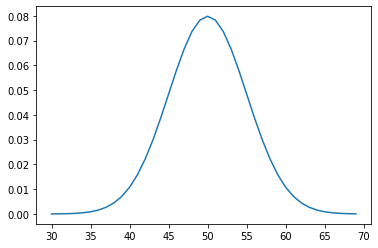

In [58]:

# idealized population distribution

from matplotlib import pyplot
from scipy.stats import norm
%matplotlib inline
# x-axis for the plot
xaxis = range(30, 70)
# y-axis for the plot
yaxis = norm.pdf(xaxis, 50,5)
# plot ideal population
pyplot.plot(xaxis, yaxis)
pyplot.show()


[49.37272096097537, 49.32943450052646, 50.26672945551934, 49.77861742397974, 50.015196426643826]


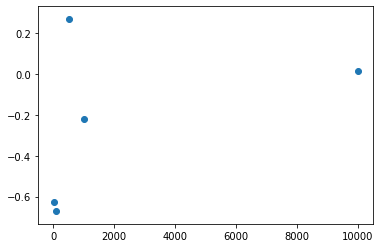

In [59]:

# demonstrate the law of large numbers

from numpy.random import randn
from numpy import mean
from numpy import array
from matplotlib import pyplot
# seed the random number generator

# sample sizes
sizes = [10, 100, 500, 1000, 10000]
# generate samples of different sizes and calculate their means
means = [mean(5 * randn(size) + 50) for size in sizes]
print(means)
# plot sample mean error vs sample size
pyplot.scatter(sizes, array(means)-50)
pyplot.show()

In [65]:
import random
def roll_dice(times):
    sum = 0
    for i in range(times):
        sum += random.randrange(1,7) #choose a random number between 1 to 6, inclusive
    return sum/times

for j in [10,100,1000,10000,100000,1000000,10000000]:
    print(roll_dice(j))

3.8
3.43
3.467
3.4882
3.50306
3.503874
3.5003302


1249.05

In [ ]:
    def scrape_actor(movie_dict):
        movie_ids = movie_dict['id']
        movie_dict['language'] = list(releases.nextSibling.nextSibling.children)[1].strip()
        html_page = requests.get('https://www.themoviedb.org/movie/'+ str(movie_id) + '/cast')
        soup = BeautifulSoup(html_page.content, 'html.parser')
        div = soup.find('ol', class_='people credits')
        all_divs = div.findAll('div', class_='info')
    
        actors = []
        for tag in all_divs:
            actors.append(tag.text.split('\n')[1])
        movie_dict['actors'] = actors
        return movie_dict

In [114]:

conn = mysql.connector.connect(
                host = config.host,
                user = config.user,
                passwd = config.password,
                database = 'movie_insights'
                )
c = conn.cursor()
for i in range(50,1000):
    print(f"At {i}" )
    params = {'api_key': config.api_key,
          'page': i
         }
    base_url = config.base_url
    response = requests.get(base_url + '/person/popular', params = params)
    response.json()['results']


    INSERT_STR = f'INSERT INTO actor_details (id, name, popularity) ' 
    VALUE_STR = 'VALUES (%s,%s,%s)'
    INSERT_QUERY = INSERT_STR + VALUE_STR
    
    for rec in response.json()['results']:
        values = tuple((rec['id'],rec['name'],rec['popularity']))
        c.execute(INSERT_QUERY, values)
        conn.commit()

c.close()
conn.close()  
    

At 50
At 51
At 52
At 53
At 54
At 55
At 56
At 57
At 58
At 59
At 60
At 61
At 62
At 63
At 64
At 65
At 66
At 67
At 68
At 69
At 70
At 71
At 72
At 73
At 74
At 75
At 76
At 77
At 78
At 79
At 80
At 81
At 82
At 83
At 84
At 85
At 86
At 87
At 88
At 89
At 90
At 91
At 92
At 93
At 94
At 95
At 96
At 97
At 98
At 99
At 100
At 101
At 102
At 103
At 104
At 105
At 106
At 107
At 108
At 109
At 110
At 111
At 112
At 113
At 114
At 115
At 116
At 117
At 118
At 119
At 120
At 121
At 122
At 123
At 124
At 125
At 126
At 127
At 128
At 129
At 130
At 131
At 132
At 133
At 134
At 135
At 136
At 137
At 138
At 139
At 140
At 141
At 142
At 143
At 144
At 145
At 146
At 147
At 148
At 149
At 150
At 151
At 152
At 153
At 154
At 155
At 156
At 157
At 158
At 159
At 160
At 161
At 162
At 163
At 164
At 165
At 166
At 167
At 168
At 169
At 170
At 171
At 172
At 173
At 174
At 175
At 176
At 177
At 178
At 179
At 180
At 181
At 182
At 183
At 184
At 185
At 186
At 187
At 188
At 189
At 190
At 191
At 192
At 193
At 194
At 195
At 196
At 197
At 198
At 199


KeyError: 'results'

In [128]:
c.close()
conn.close()

In [145]:

    
left_column.findAll('p')

[<p><strong><bdi>Known For</bdi></strong> Acting</p>,
 <p><strong><bdi>Gender</bdi></strong> Male</p>,
 <p><strong><bdi>Known Credits</bdi></strong> 129</p>,
 <p><strong><bdi>Birthday</bdi></strong> 1965-04-04</p>,
 <p><strong><bdi>Place of Birth</bdi></strong> Manhattan, New York City, New York, USA</p>,
 <p><strong><bdi>Official Site</bdi></strong> -</p>,
 <p class="no_pad">
 <strong><bdi>Also Known As</bdi></strong>
 </p>,
 <p class="rounded new_button pad"><a class="" href="/login"><span class="glyphicons glyphicons-lock x1"></span> Login to edit</a></p>,
 <p><a class="no_click" href="#" id="keyboard_shortcuts">Keyboard Shortcuts</a></p>]

In [148]:
print(list(left_column.findAll('p')[1].children)[1].strip())
print(list(left_column.findAll('p')[2].children)[1].strip())
if list(left_column.findAll('p')[4])[1].strip().split(", ")[-1] == 'USA':
    list(left_column.findAll('p')[4])[1].strip().split(", ")[-2]
else:
    print(None)

Male
129
New York


In [158]:
conn = mysql.connector.connect(
                host = config.host,
                user = config.user,
                passwd = config.password,
                database = 'movie_insights'
                )
c = conn.cursor()

for j in range(2491,18083):
    c.execute(f'select id from actor_details where idactor_details={j}')
    actor_id = c.fetchall()[0][0]
    html_page = requests.get('https://www.themoviedb.org/person/' + str(actor_id))
    soup = BeautifulSoup(html_page.content, 'html.parser')
    left_column = soup.find('section', class_='facts left_column')
    try:
        c.execute(f"""UPDATE actor_details 
            SET 
            gender = '{list(left_column.findAll('p')[1].children)[1].strip()}',
            state = '{list(left_column.findAll('p')[4])[1].strip().split(", ")[-2] 
                     if list(left_column.findAll('p')[4])[1].strip().split(", ")[-1] == 'USA'
                     else None}',
            known_credits = {list(left_column.findAll('p')[2].children)[1].strip()}
        WHERE
            idactor_details = {j};""")
        conn.commit()
    except:
        print(f'Break at {j}')

c.close()
conn.close()

Break at 3167
Break at 3244
Break at 3275
Break at 3744
Break at 3995
Break at 4711
Break at 5155
Break at 5244
Break at 5607
Break at 5947
Break at 6290
Break at 6559
Break at 7376
Break at 9335
Break at 9490
Break at 10160
Break at 10479
Break at 10578
Break at 10609
Break at 10786
Break at 12056
Break at 12443
Break at 12772
Break at 13293
Break at 13309
Break at 14076
Break at 15270
Break at 15779
Break at 16033
Break at 16714
Break at 17218
Break at 17267
Break at 17299
Break at 17657


In [ ]:
html_page = requests.get('https://www.themoviedb.org/movie/' + str(movie_id)) #Make a get request to retrieve the page
 #Pass the page contents to beautiful soup for parsing
        releases = soup.find('ul', class_="releases")
        revenue = releases.nextSibling.nextSibling.nextSibling.nextSibling.nextSibling.nextSibling.nextSibling.nextSibling
        try:
            movie_dict['revenue'] = float(str(revenue.text).replace(revenue.strong.text, "").replace('$','').replace(',','').strip())
        except:
            movie_dict['revenue'] = None
        budget = releases.nextSibling.nextSibling.nextSibling.nextSibling.nextSibling.nextSibling
        try:
            movie_dict['budget'] = float(str(budget.text).replace(budget.strong.text, "").replace('$','').replace(',','').strip())
        except:
            movie_dict['budget'] = None
        release_date = releases.div.previous_sibling.previous_sibling.previous_sibling.replace('\n','').strip()
        movie_dict['release_date'] = datetime.datetime.strptime(release_date, "%B %d, %Y").date()
#         movie_dict['language'] = list(releases.nextSibling.nextSibling.children)[1].strip()
#         html_page = requests.get('https://www.themoviedb.org/movie/'+ str(movie_id) + '/cast')
#         soup = BeautifulSoup(html_page.content, 'html.parser')
#         div = soup.find('ol', class_='people credits')
#         all_divs = div.findAll('div', class_='info')
    
#         actors = []
#         for tag in all_divs:
#             actors.append(tag.text.split('\n')[1])
#         movie_dict['actors'] = actors
        return movie_dict

In [168]:
import requests
from bs4 import BeautifulSoup
import mysql.connector
from mysql.connector import errorcode
import datetime
import config

conn = mysql.connector.connect(
                host = config.host,
                user = config.user,
                passwd = config.password,
                database = 'movie_insights'
                )
c = conn.cursor()

def populate_db(records, table_name):
#         INSERT_STRING = ("INSERT INTO {table_name} "
#                    "(id, vote_average, title, genre_ids, revenue, budget, release_date) "
#                    "VALUES (%s, %s, %s, %s)")
    INSERT_STR = f'INSERT INTO {table_name} (genre_id, movie_title, movie_id) ' 
    VALUE_STR = 'VALUES (%s, %s, %s)'
    INSERT_QUERY = INSERT_STR + VALUE_STR
    
    for rec in less_info:
        for genre_id in rec['genre_ids']:
            values = tuple((genre_id,rec['title'],rec['id']))
            c.execute(INSERT_QUERY, values)
            conn.commit()

base_url = config.base_url

for i in range(1,51):
    params = {'api_key': config.api_key, 'sort_by':'vote_average.desc', 'vote_count.gte': 100,
              'page': i, 
              'with_original_language': 'en'}
    
    response = requests.get(base_url + '/discover/movie', params = params)
    if response.status_code != 200:
        print(f'Break at {i}, status code: {response.status_code}')
        break
    
    less_info = list(map(lambda x: {'id':x['id'],
                                    'title': x['title'],
                                    'genre_ids': x['genre_ids'],
                                   },response.json()['results']))


    populate_db(movie_info,'genre')
c.close()
conn.close()  
    
    

In [1]:
c.close()
conn.close()  
    

NameError: name 'c' is not defined

In [4]:
c.execute("""select g.genre_id, count(*) from genre g
            join movie_info m on g.movie_id=m.id
            group by g.genre_id
            order by m.vote_average desc""")

In [5]:
c.fetchall()

[(18, 611),
 (80, 156),
 (99, 86),
 (10402, 55),
 (36, 66),
 (10752, 63),
 (14, 80),
 (53, 166),
 (28, 128),
 (12, 151),
 (16, 92),
 (878, 96),
 (35, 223),
 (10749, 159),
 (27, 36),
 (10770, 16),
 (9648, 87),
 (10751, 114),
 (37, 34)]

In [10]:
def genre_id():
    parameters = {'api_key': config.api_key} #these parameters go in to the URL
    response = requests.get('https://api.themoviedb.org/3/genre/movie/list?language=en-US', params = parameters)
    response.status_code #check this, should be 200
    return response.json()
genres = genre_id()['genres']
genres

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 16, 'name': 'Animation'},
 {'id': 35, 'name': 'Comedy'},
 {'id': 80, 'name': 'Crime'},
 {'id': 99, 'name': 'Documentary'},
 {'id': 18, 'name': 'Drama'},
 {'id': 10751, 'name': 'Family'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 36, 'name': 'History'},
 {'id': 27, 'name': 'Horror'},
 {'id': 10402, 'name': 'Music'},
 {'id': 9648, 'name': 'Mystery'},
 {'id': 10749, 'name': 'Romance'},
 {'id': 878, 'name': 'Science Fiction'},
 {'id': 10770, 'name': 'TV Movie'},
 {'id': 53, 'name': 'Thriller'},
 {'id': 10752, 'name': 'War'},
 {'id': 37, 'name': 'Western'}]

In [11]:
def populate_db(table_name):
#         INSERT_STRING = ("INSERT INTO {table_name} "
#                    "(id, vote_average, title, genre_ids, revenue, budget, release_date) "
#                    "VALUES (%s, %s, %s, %s)")
    INSERT_STR = f'INSERT INTO {table_name} (id, name) ' 
    VALUE_STR = 'VALUES (%s, %s)'
    INSERT_QUERY = INSERT_STR + VALUE_STR
    
    for rec in genres:
        values = tuple(rec.values())
        c.execute(INSERT_QUERY, values)
        conn.commit()


    
populate_db('genre_key')
c.close()
conn.close()  
    
    

In [12]:
conn = mysql.connector.connect(
                host = config.host,
                user = config.user,
                passwd = config.password,
                database = 'movie_insights'
                )
c = conn.cursor()

In [14]:
c.execute("""select distinct a.name, count(a.name) from
actor_info a
join top_grossing_stars t on t.name = a.name
group by a.name
order by count(a.name) desc
limit 15""")
actor_count = c.fetchall()

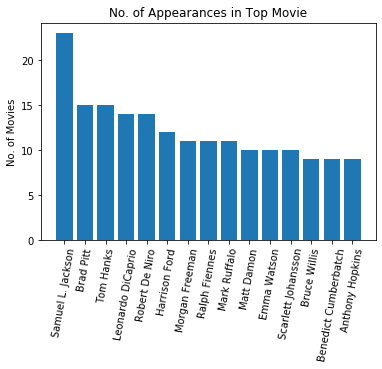

In [19]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.bar(range(len(actor_count)), [val[1] for val in actor_count], align='center')
plt.xticks(range(len(actor_count)), [val[0] for val in actor_count])
plt.xticks(rotation=80)
plt.title("No. of Appearances in Top Movie")
plt.ylabel('No. of Movies')
plt.show()

In [16]:
c.execute("""select k.name, count(*) from genre g
join movie_info m on g.movie_id=m.id
join genre_key k on k.id = g.genre_id
group by g.genre_id
order by m.vote_average desc;""")

In [17]:
genre_count = c.fetchall()

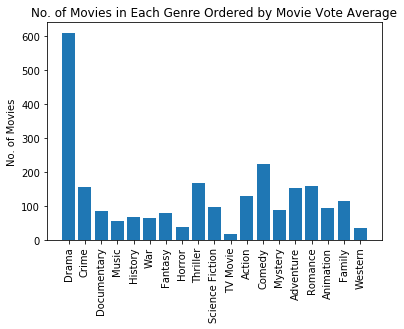

In [66]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.bar(range(len(genre_count)), [val[1] for val in genre_count], align='center')
plt.xticks(range(len(genre_count)), [val[0] for val in genre_count])
plt.xticks(rotation=90)
plt.title("No. of Movies in Each Genre Ordered by Movie Vote Average")
plt.ylabel('No. of Movies')
plt.savefig('genre_count.png')
plt.show()

In [21]:
sum([x[1] for x in genre_count])

2419

In [11]:
c.close()
conn.close()  
    

In [26]:
import csv

In [59]:
with open('female_representation_project_1.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for l,row in enumerate(spamreader):
        INSERT_STR = f'INSERT INTO female_representation (movie_id, f_rep, percent_profit, vote_average) ' 
        VALUE_STR = 'VALUES (%s, %s, %s, %s)'
        INSERT_QUERY = INSERT_STR + VALUE_STR
        
        if l>0:
            values = tuple((lambda x: [int(x[0]) if x[0] != 'NULL' else None,
                                       float(x[1]) if x[1] != 'NULL' else None,
                                       float(x[2]) if x[2] != 'NULL' else None,
                                       float(x[3]) if x[3]  != 'NULL' else None
                                      ])(row[0].split(",")))
            print(values)
            c.execute(INSERT_QUERY, values)
        conn.commit()


    

(11, 0.0833, 7049.07, 8.2)
(12, 0.1765, 1000.36, 7.8)
(13, 0.2667, 1232.63, 8.4)
(14, 0.6, 2375.31, 8.0)
(15, 0.125, 2764.91, 8.1)
(16, 0.3, 312.75, 7.9)
(18, 0.1176, 293.24, 7.4)
(22, 0.4444, 467.87, 7.7)
(24, 0.4545, 603.16, 7.9)
(28, 0.2, 284.0, 8.2)
(33, 0.25, 1136.84, 7.9)
(38, 0.3, 361.29, 8.1)
(63, 0.2308, 572.34, 7.5)
(69, 0.2857, 665.85, 7.4)
(70, 0.2308, 722.55, 7.9)
(71, 0.4, 2185.61, 7.6)
(73, 0.2857, 119.38, 8.4)
(77, 0.1667, 441.37, 8.2)
(78, 0.2222, 117.39, 7.9)
(85, 0.0714, 2166.26, 7.9)
(89, 0.0667, 987.86, 7.8)


ValueError: could not convert string to float: 'NULL'

In [38]:

# populate_db('genre_key')

In [5]:
import requests
from bs4 import BeautifulSoup
import mysql.connector
from mysql.connector import errorcode
import datetime
import config

conn = mysql.connector.connect(
                host = config.host,
                user = config.user,
                passwd = config.password,
                database = 'movie_insights'
                )
c = conn.cursor()

In [6]:
c.execute("""select *
from top_grossing_stars""")

In [7]:
c.fetchall()

[(1, 'Robert Downey, Jr.', 14135500000.0, 43, 328733000.0),
 (2, 'Samuel L. Jackson', 14125100000.0, 61, 231559000.0),
 (3, 'Scarlett Johansson', 13574500000.0, 29, 468086000.0),
 (4, 'Chris Hemsworth', 11193500000.0, 22, 508794000.0),
 (5, 'Zoe Saldana', 10903700000.0, 26, 419373000.0),
 (6, 'Chris Evans', 10739100000.0, 25, 429564000.0),
 (7, 'Chris Pratt', 10539500000.0, 17, 619970000.0),
 (8, 'Tom Hanks', 10422100000.0, 51, 204354000.0),
 (9, 'Bradley Cooper', 10386200000.0, 26, 399471000.0),
 (10, 'Johnny Depp', 10293800000.0, 51, 201839000.0),
 (11, 'Tom Cruise', 10013400000.0, 41, 244230000.0),
 (12, 'Mark Ruffalo', 9812210000.0, 21, 467248000.0),
 (13, 'Vin Diesel', 9655720000.0, 23, 419814000.0),
 (14, 'Emma Watson', 9093130000.0, 15, 606209000.0),
 (15, 'Don Cheadle', 8910170000.0, 19, 468956000.0),
 (16, 'Jeremy Renner', 8839070000.0, 16, 552442000.0),
 (17, 'Daniel Radcliffe', 8231680000.0, 20, 411584000.0),
 (18, 'Will Smith', 7787240000.0, 31, 251201000.0),
 (19, 'Rupert 